In [ ]:
import scvelo as scv
scv.logging.print_version()
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization

import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scanpy.external as sce
import sys
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')
sns.set_style("ticks")

Running scvelo 0.2.5 (python 3.8.13) on 2025-10-20 10:43.
scanpy==1.9.3 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.2.1 statsmodels==0.13.5 python-igraph==0.10.1 louvain==0.7.1 pynndescent==0.5.8


In [ ]:
adata = scv.read('adata_loom.h5ad')

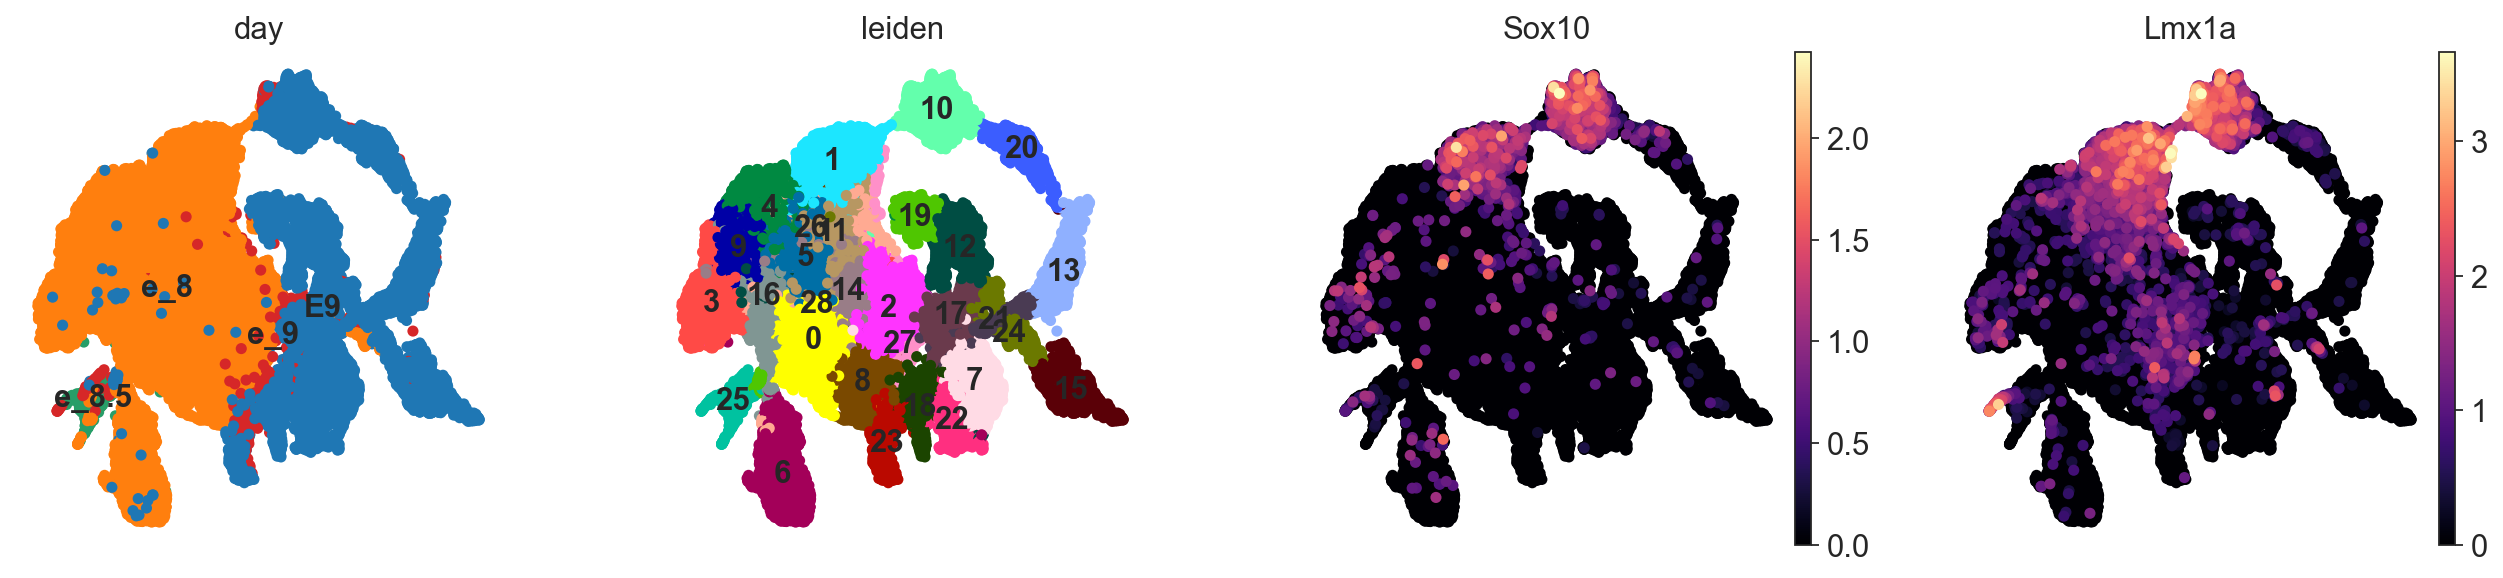

In [ ]:
sc.pl.umap(adata, color=[  'day',  'leiden', 'Sox10', 'Lmx1a'
                            ], size=100, frameon=False, legend_loc='on data', color_map='magma')

In [ ]:
adata

AnnData object with n_obs × n_vars = 42129 × 25865
    obs: 'plate', 'day', 'location', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_score', 'predicted_doublet', 'batch', 'leiden'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'day_colors', 'hvg', 'leiden', 'leiden_colors', 'location_colors', 'log1p', 'neighbors', 'pca', 'plate_colors', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    layers: 'ambiguous', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

In [ ]:
adata.obs_names

Index(['AAAGTGACACGATTCA', 'AAAGGTAAGGGTACGT', 'AAACGCTGTCCGACGT',
       'AAAGGATTCAAGTTGC', 'AAACGAAGTTGAGAGC', 'AAAGGTACAGTCAGTT',
       'AACAAGAAGCGACCCT', 'AACCCAATCAGCTCTC', 'AACCATGTCCATGATG',
       'AACAAAGCATCCGGTG',
       ...
       'TTTACTGAGGCTAACG-3', 'TTTCCTCTCATACGAC-3', 'TTTACTGAGATCCAAA-3',
       'TTTGGTTGTAGTCTTG-3', 'TTTGATCGTTACCGTA-3', 'TTTATGCAGCTGTTCA-3',
       'TTGTTTGGTCGTTGGC-3', 'TTTGGTTGTCTACAGT-3', 'TTTGATCTCTGAACGT-3',
       'TTTCATGCAAGAAACT-3'],
      dtype='object', length=42129)

Normalized count data: X, spliced, unspliced.
Extracted 3000 highly variable genes.
computing moments based on connectivities
    finished (0:00:04) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:10) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/32 cores)


  0%|          | 0/42129 [00:00<?, ?cells/s]

    finished (0:02:24) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:11) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


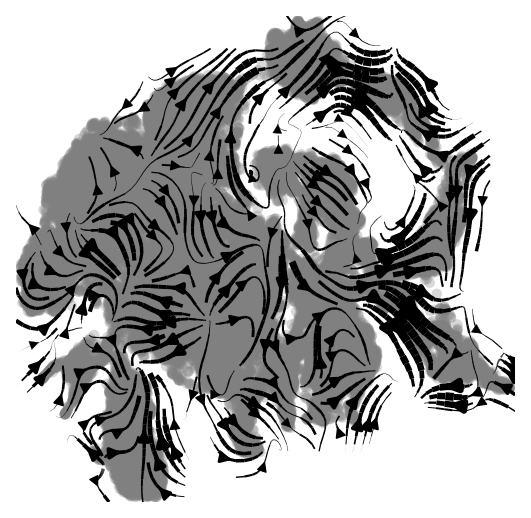

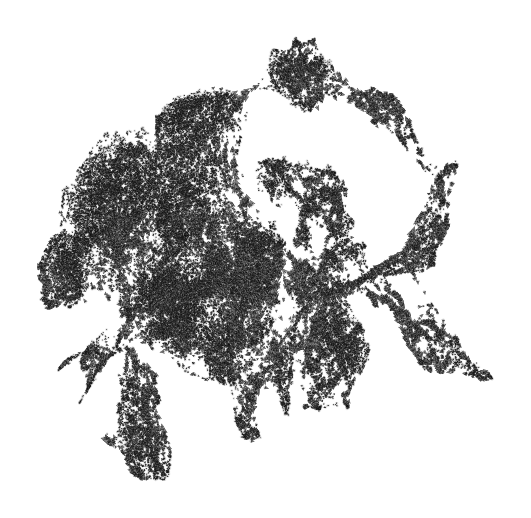

In [ ]:
scv.pp.filter_and_normalize(adata,  n_top_genes=3000, enforce=True)

# Step 2: Moments Calculation - Adjust the number of neighbors and PCs
# You can adjust n_neighbors for a better balance between local and global structure
scv.pp.moments(adata, n_neighbors=30, n_pcs=40)

# Step 3: Velocity Calculation - Adjust the mode of velocity calculation
# 'deterministic' mode is default, but 'stochastic' or 'dynamical' can sometimes give better results
scv.tl.velocity(adata, mode='deterministic')  # Try 'stochastic' or 'dynamical' as alternatives

# Step 4: Velocity Graph Construction
scv.tl.velocity_graph(adata)

# Step 5: Velocity Embedding and Visualization - Adjust arrow length and density
scv.pl.velocity_embedding_stream(adata, basis='umap', density=2, linewidth=2, smooth=0.8)

# Optionally visualize with arrows instead of streamlines
scv.pl.velocity_embedding(adata, basis='umap', arrow_size=4, arrow_length=5)


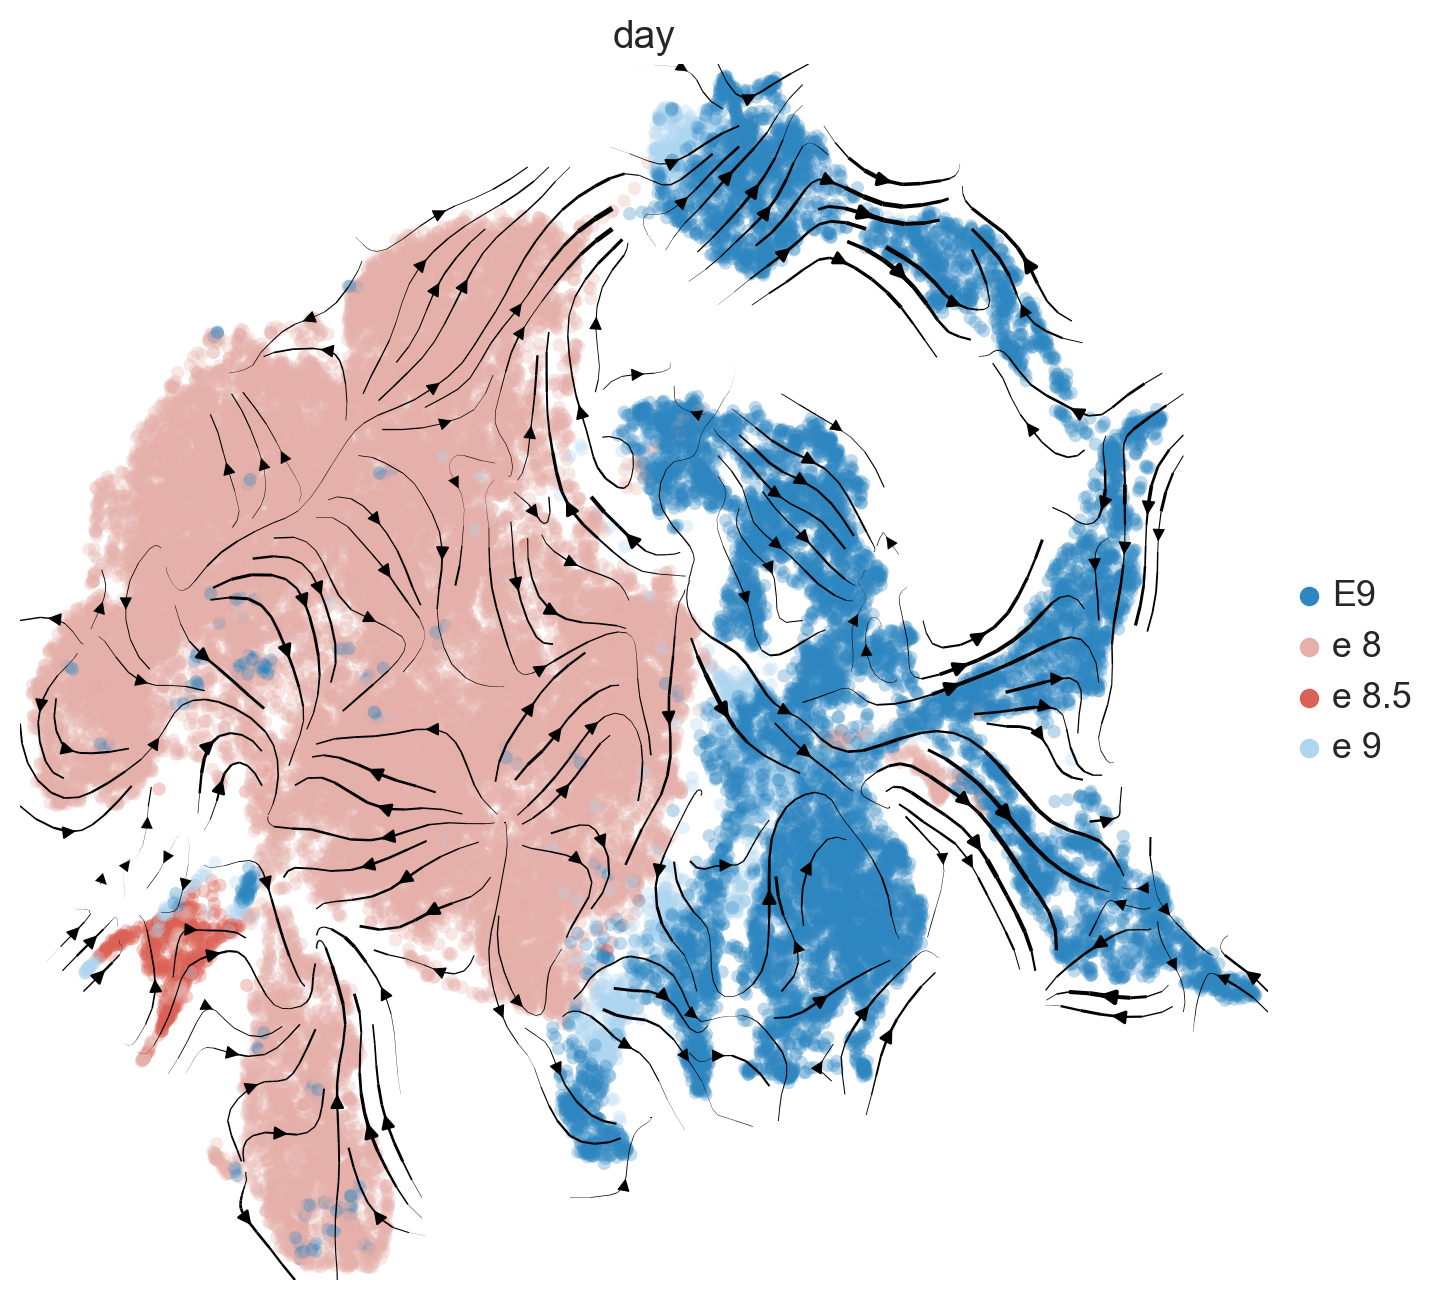

In [ ]:
import scvelo as scv
import matplotlib.pyplot as plt

# Define your custom palette for the 'day' groups
custom_palette = ['#2e86c1', '#e6b0aa', '#dc6155', '#aed6f1']
color_mapping = dict(zip(['E9', 'e_8', 'e_8.5', 'e_9'], custom_palette))

# Plot velocity streamlines on the UMAP
scv.pl.velocity_embedding_stream(
    adata,
    basis='umap',  # Use UMAP embedding
    color='day',   # Color by 'day' or other grouping in .obs
    palette=color_mapping,  # Use your custom color palette
    legend_loc='right margin',  # Adjust legend position
    figsize=(8, 8),  # Adjust figure size
    dpi=100          # For high-quality output
)

# Optionally, save the plot
#plt.savefig("velocity_stream_umap.pdf", format="pdf", bbox_inches="tight")
plt.show()

figure cannot be saved as pdf, using png instead.
saving figure to file ./figures/scvelo_111.png


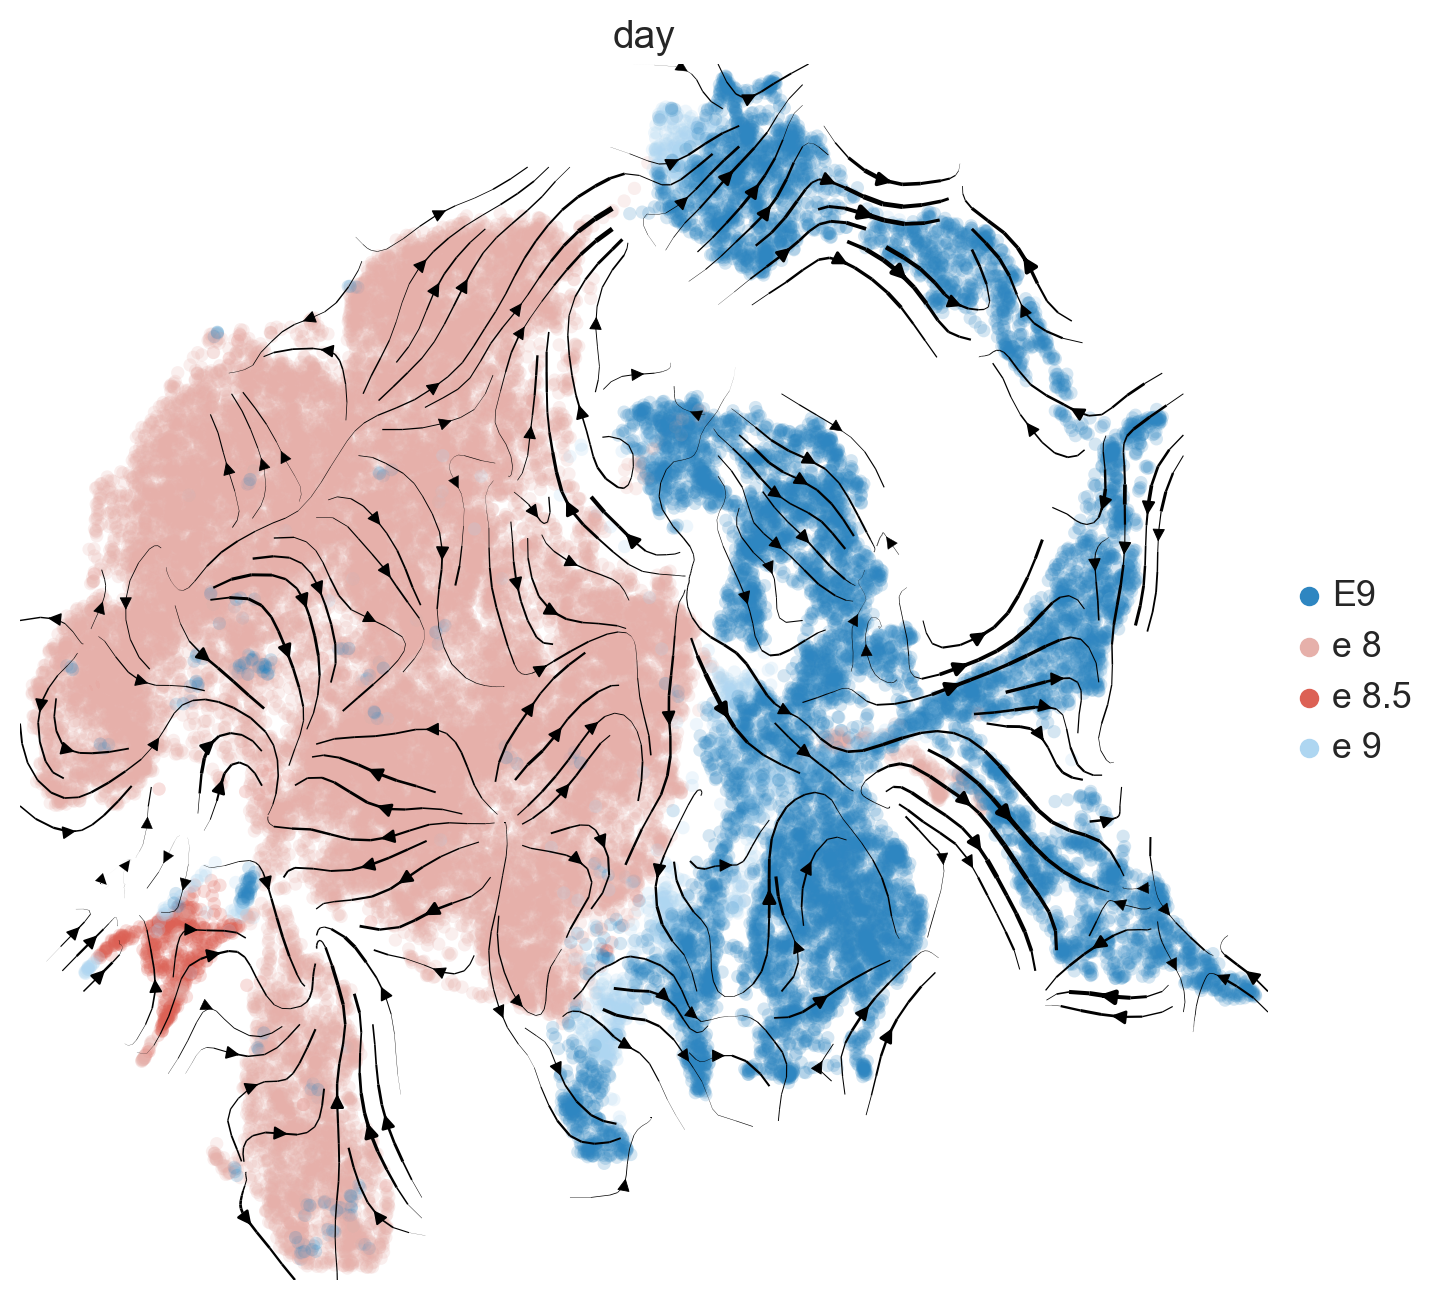

In [ ]:
import scvelo as scv
import matplotlib.pyplot as plt

# Define your custom palette for the 'day' groups
custom_palette = [ '#aed6f1', '#e6b0aa', '#dc6155', '#2e86c1', ]
color_mapping = dict(zip([  'e_9', 'e_8','e_8.5', 'E9', ], custom_palette))

# Plot velocity streamlines on the UMAP
scv.pl.velocity_embedding_stream(
    adata,
    basis='umap',  # Use UMAP embedding
    color='day',   # Color by 'day' or other grouping in .obs
    palette=color_mapping,  # Use your custom color palette
    legend_loc='right margin',  # Adjust legend position
    figsize=(8, 8),  # Adjust figure size
    dpi=100   , save='111.pdf'    , alpha = .2   # For high-quality output
)

# Optionally, save the plot
#plt.savefig("velocity_stream_umap.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
adata.write_h5ad('Epcam_velocity.h5ad')